In [21]:
#!pip install xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score,mean_squared_error,accuracy_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


# Data Preparation

In [3]:
df = pd.read_csv('../data/processed/crossfit_db.csv')

In [4]:
#removing null values
df = df.dropna()

# Model

In [5]:
scaler = StandardScaler()

In [6]:
drop_features = ['year', 'firstName', 'lastName', 'status', 'gender', 'age', 
                 'rank_2023_1', 'rank_2023_2', 'rank_2023_3','rank_2023_4',
                 'countryOfOriginCode', 'regionId', 'affiliateId', 'affiliateName',
                 'competitorName', 'countryOfOriginName', 'regionName' ,
                 'overallRank', 'overall_score_2023',
                 'score_reps_2023_1', 'score_reps_2023_2','score_reps_2023_3','score_reps_2023_4', 'score_time_2023_4'
                 ]

X = df.drop(columns=drop_features)
y = df["overall_score_2023"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeRegressor(max_depth=5,  random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

# Evaluate Model

In [7]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [8]:
y_pred = model.predict(X_test_scaled)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

error = mean_absolute_percentage_error(y_pred, y_test)
print("Mean absolute percentage error {0:.2f}%".format(error))

R2: 0.7932419990558668
MAE: 36063.01143597075
RMSE: 50453.82792359536
Mean absolute percentage error 29.70%


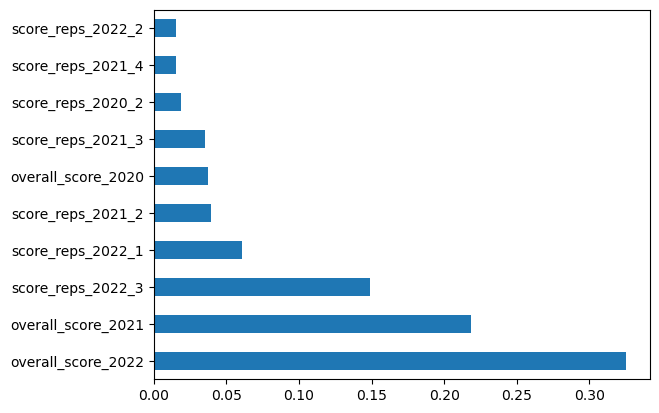

In [9]:
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)

feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

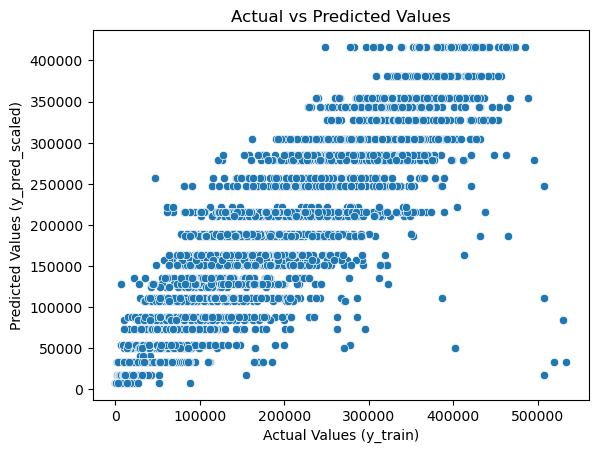

In [10]:
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred_scaled)')
plt.show()

# GridSearch

In [23]:
rf_param_grid = {
    "splitter":["best","random"],
            "max_depth" : [1,2,3,4,5],
           "min_samples_leaf":[10,50,100,200],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
}

# Instantiate a Random Forest Regressor
rf_reg = DecisionTreeRegressor(random_state = 42)

# Setup grid search
rf_grid = GridSearchCV(estimator = rf_reg, param_grid = rf_param_grid, cv=10, refit=True)

# Fit the grid search model on training dataset
rf_grid.fit(X_train_scaled, y_train)

# Get best RF estimator based on best parameters, and use RF regressor to predict on test set
rf_best = rf_grid.best_estimator_
y_pred = rf_best.predict(X_test_scaled)
print('Best parameters:', rf_grid.best_params_)

Best parameters: {'max_depth': 3, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [24]:
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

error = mean_absolute_percentage_error(y_pred, y_test)
print("Mean absolute percentage error {0:.2f}%".format(error))

R2: 0.7526925177646281
MAE: 40189.99049603524
RMSE: 55179.9861890967
Mean absolute percentage error 32.25%


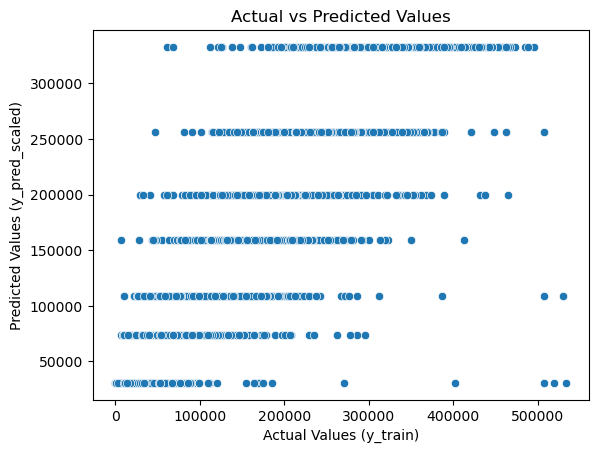

In [25]:
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred_scaled)')
plt.show()